# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [6]:
import numpy as np

In [7]:
timesteps = 100
input_features = 32
output_features= 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

sucessive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  sucessive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [8]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Embedding(10000, 32)) # 10000개 embedding, ouputs=32
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # return_sequences : 시퀀스로 넘겨줄건지
model.add(SimpleRNN(16))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
Total params: 322864 (1.23 MB)
Trainable params: 322864 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [13]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) # 1인 이유 : imdb 라서 긍정이냐 부정이냐 하나만 필요, sigmoid : binary라서

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [16]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 88s 547ms/step - loss: 0.6372 - acc: 0.6193 - val_loss: 0.5607 - val_acc: 0.7258
Epoch 2/10
157/157 [==============================] - 88s 561ms/step - loss: 0.4025 - acc: 0.8288 - val_loss: 0.4010 - val_acc: 0.8362
Epoch 3/10
157/157 [==============================] - 80s 512ms/step - loss: 0.3054 - acc: 0.8776 - val_loss: 0.3470 - val_acc: 0.8586
Epoch 4/10
157/157 [==============================] - 79s 500ms/step - loss: 0.2471 - acc: 0.9035 - val_loss: 0.4123 - val_acc: 0.8174
Epoch 5/10
157/157 [==============================] - 77s 492ms/step - loss: 0.1938 - acc: 0.9255 - val_loss: 0.4439 - val_acc: 0.8468
Epoch 6/10
157/157 [==============================] - 76s 483ms/step - loss: 0.1511 - acc: 0.9456 - val_loss: 0.3842 - val_acc: 0.8636
Epoch 7/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1028 - acc: 0.9657 - val_loss: 0.5024 - val_acc: 0.8492
Epoch 8/10
157/157 [==============================] - 7

### 시각화

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-17-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


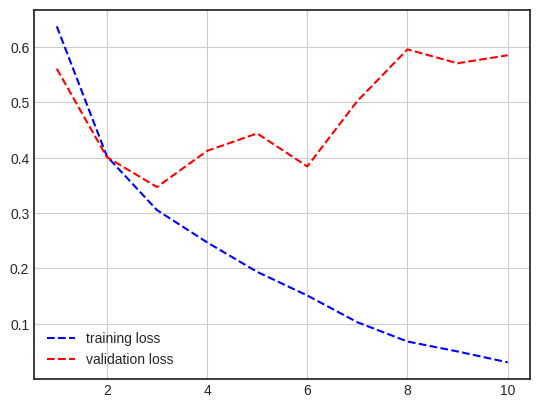

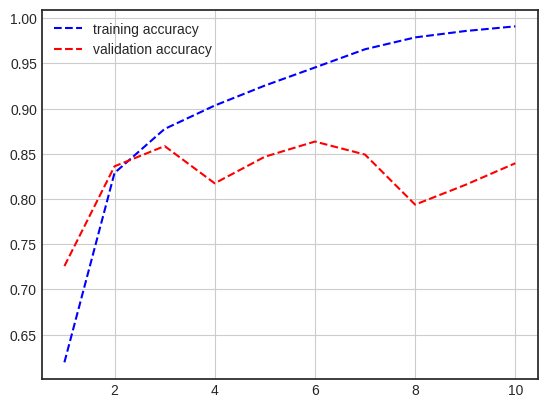

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r--', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r--', label='validation accuracy')
plt.grid()
plt.legend()
plt.show()

In [21]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 31s 40ms/step - loss: 0.5934 - acc: 0.8403


[0.5934072732925415, 0.8402799963951111]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [23]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM ,GRU, Embedding

In [26]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [30]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 98ms/step - loss: 0.6114 - acc: 0.6514 - val_loss: 0.4531 - val_acc: 0.8130
Epoch 2/10
157/157 [==============================] - 15s 99ms/step - loss: 0.3887 - acc: 0.8404 - val_loss: 0.3627 - val_acc: 0.8382
Epoch 3/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2945 - acc: 0.8845 - val_loss: 0.3471 - val_acc: 0.8492
Epoch 4/10
157/157 [==============================] - 8s 51ms/step - loss: 0.2443 - acc: 0.9094 - val_loss: 0.3638 - val_acc: 0.8696
Epoch 5/10
157/157 [==============================] - 8s 49ms/step - loss: 0.2117 - acc: 0.9215 - val_loss: 0.5662 - val_acc: 0.8116
Epoch 6/10
157/157 [==============================] - 6s 37ms/step - loss: 0.1902 - acc: 0.9305 - val_loss: 0.3776 - val_acc: 0.8728
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1736 - acc: 0.9381 - val_loss: 0.4315 - val_acc: 0.8402
Epoch 8/10
157/157 [==============================] - 6s 35ms/step

In [ ]:
# rnn 입력 하나 출력 하나
# lstm 입력 두개 출력 두개인 순환 구조

### 시각화

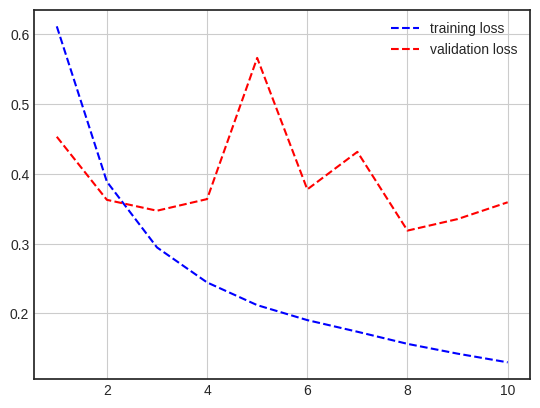

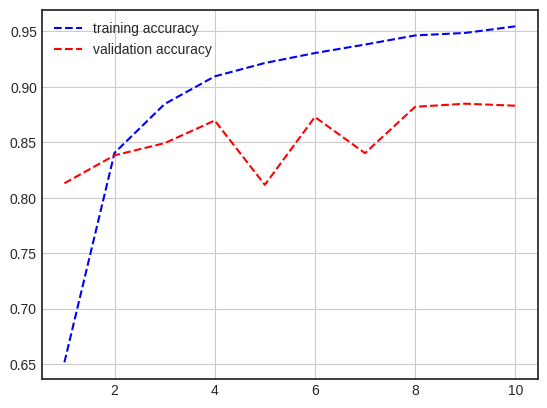

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r--', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r--', label='validation accuracy')
plt.grid()
plt.legend()
plt.show()

### 모델 평가

In [32]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.3977 - acc: 0.8717


[0.39774706959724426, 0.871720016002655]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 데이터셋 로드

In [34]:
from tensorflow.keras.datasets import reuters

In [36]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2110848/2110848 [==============================] - 1s 1us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
max_len = 300

In [39]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

300


In [40]:
pad_x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [42]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax')) # 왜 46?

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru (GRU)                   (None, None, 256)         394752    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3108910 (11.86 MB)
Trainable params: 3108910 (11.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [44]:
history = model.fit(pad_x_train, y_train,
                    batch_size = 32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 31s 115ms/step - loss: 2.0268 - acc: 0.4601 - val_loss: 1.8024 - val_acc: 0.5570
Epoch 2/20
225/225 [==============================] - 19s 84ms/step - loss: 1.5253 - acc: 0.6127 - val_loss: 1.4266 - val_acc: 0.6461
Epoch 3/20
225/225 [==============================] - 15s 66ms/step - loss: 1.1880 - acc: 0.6984 - val_loss: 1.2968 - val_acc: 0.6789
Epoch 4/20
225/225 [==============================] - 12s 55ms/step - loss: 0.9312 - acc: 0.7578 - val_loss: 1.3853 - val_acc: 0.6750
Epoch 5/20
225/225 [==============================] - 10s 43ms/step - loss: 0.7338 - acc: 0.8120 - val_loss: 1.3519 - val_acc: 0.6873
Epoch 6/20
225/225 [==============================] - 12s 52ms/step - loss: 0.5809 - acc: 0.8475 - val_loss: 1.4274 - val_acc: 0.7023
Epoch 7/20
225/225 [==============================] - 9s 38ms/step - loss: 0.4650 - acc: 0.8807 - val_loss: 1.4413 - val_acc: 0.6984
Epoch 8/20
225/225 [==============================] - 9s 40ms/

### 시각화

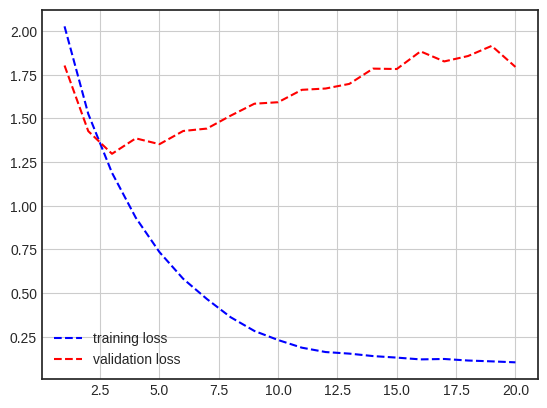

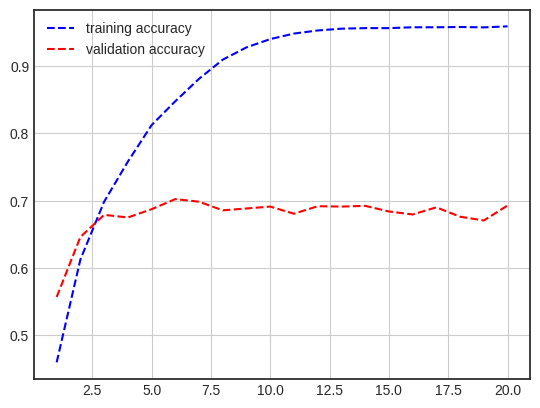

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r--', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r--', label='validation accuracy')
plt.grid()
plt.legend()
plt.show()

### 모델 평가


In [46]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 14ms/step - loss: 1.9840 - acc: 0.6803


[1.9840165376663208, 0.6803205609321594]